In [ ]:
# Sample size
# Effect size
# Significance level = P (Type I error) = probability of finding an effect that is not there
# Power = 1 - P (Type II error) = probability of finding an effect that is there

# given any three of these, can easily determine the fourth

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# null hypothesis: no difference between means

In [9]:
sample_size = 12

control_mean = 0
control_sd = 0.21

experimental_mean = 0.17
experimental_sd = 0.21

n_sim = 1000  

In [12]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

for s in range(n_sim):
    
    control = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
    experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)
    
    t_test = stats.ttest_ind(control, experimental)
    
    p[s] = t_test[1]
    
num_null_rejects = np.sum(p < 0.05)
power = num_null_rejects/float(n_sim)

power

0.495

In [ ]:
power: the probability of rejecting the null hypothesis when it is indeed false

In [16]:
from statsmodels.stats.power import TTestPower

power = TTestPower()
power.solve_power(effect_size=0.17, alpha=0.05, power=.8)

target = 0.8


sample_size = 12
null_rejected = 0
n_sim = 10000

In [17]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

# keep iterating until desired power is obtained

power_sample = []
while null_rejected < target:

    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
    
    # For control group 
    # Here we specify size=[n_sim, sample_size] which creates an array of n_sim number of arrays,
    # each containing sample_size number of elements. 
    # This is equivalent to manually looping n_sim times like we did above but is much faster.
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    
    # For experimental group
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            
    
    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
                                
    p_vals = result[1]

    #Since you know that all simulations are from a different distribution \
    #all those that rejected the null-hypothesis are valid
    null_rejected = np.sum(p_vals < 0.05) / n_sim

    print("Number of Samples:", sample_size,", Calculated Power =", null_rejected)
    power_sample.append([sample_size, null_rejected])

    # increase the number of samples by one for the next iteration of the loop
    sample_size += 1

Number of Samples: 12 , Calculated Power = 0.4754
Number of Samples: 13 , Calculated Power = 0.5066
Number of Samples: 14 , Calculated Power = 0.5423
Number of Samples: 15 , Calculated Power = 0.5767
Number of Samples: 16 , Calculated Power = 0.6038
Number of Samples: 17 , Calculated Power = 0.6297
Number of Samples: 18 , Calculated Power = 0.658
Number of Samples: 19 , Calculated Power = 0.6783
Number of Samples: 20 , Calculated Power = 0.7056
Number of Samples: 21 , Calculated Power = 0.7266
Number of Samples: 22 , Calculated Power = 0.7481
Number of Samples: 23 , Calculated Power = 0.7624
Number of Samples: 24 , Calculated Power = 0.7864
Number of Samples: 25 , Calculated Power = 0.8031


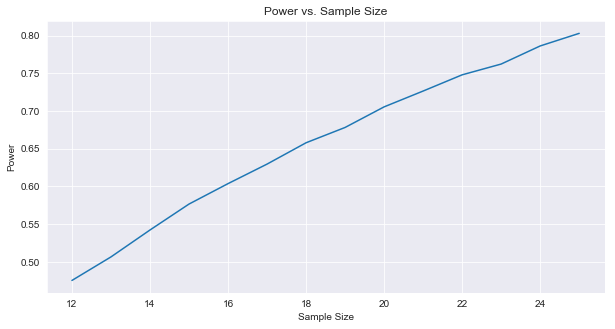

In [19]:
plt.figure(figsize=(10,5))
import pandas as pd
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = power_sample
df = pd.DataFrame(ans, index=None)
plt.plot(df[0], df[1])

plt.show()

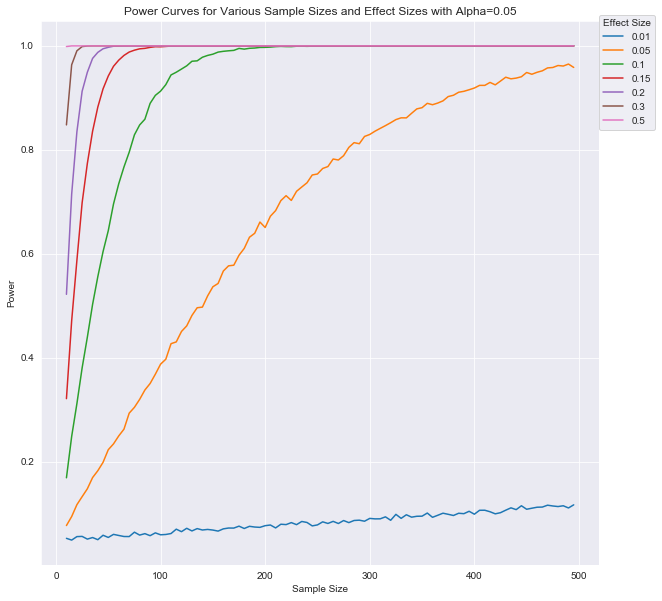

In [20]:
def power_curve(min_sample_size = 10, max_sample_size=500, n_sim = 10000, control_mean = 0,
                control_sd = 0.21, experimental_mean = 0.17, experimental_sd = 0.21):
    p = (np.empty(n_sim))
    p.fill(np.nan)

    # keep iterating until desired power is obtained

    power_sample = []
    for sample_size in range(min_sample_size, max_sample_size, 5):

        data = np.empty([n_sim, sample_size, 2])
        data.fill(np.nan)

        # For control group 
        data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])

        # For experimental group
        data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            

        result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)

        p_vals = result[1]

        #Since you know that all simulations are from a different distribution \
        #all those that rejected the null-hypothesis are valid
        null_rejected = np.sum(p_vals < 0.05) / n_sim

        power_sample.append(null_rejected)

    return power_sample
cols = {}

for exp_mean in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
    col = power_curve(experimental_mean=exp_mean)
    cols[exp_mean] = col
df = pd.DataFrame.from_dict(cols)
df.index = list(range(10,500,5))
df.plot(figsize=(10,10))
plt.legend(title='Effect Size',loc=(1,0.8))
plt.title('Power Curves for Various Sample Sizes and Effect Sizes with Alpha=0.05')
plt.xlabel('Sample Size')
plt.ylabel('Power');